# Import Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Loading the dataset

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Visualising with Heatmap

<AxesSubplot:>

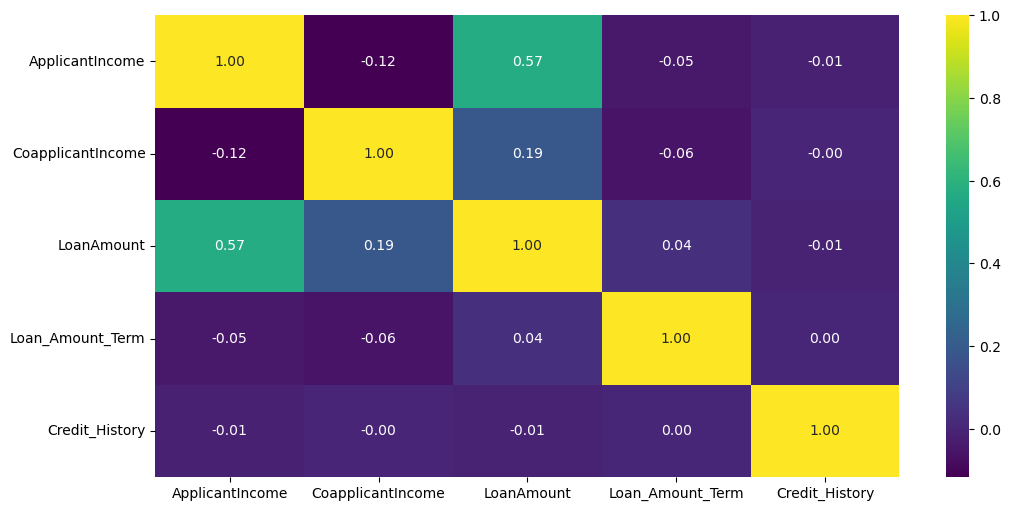

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [8]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

<AxesSubplot:>

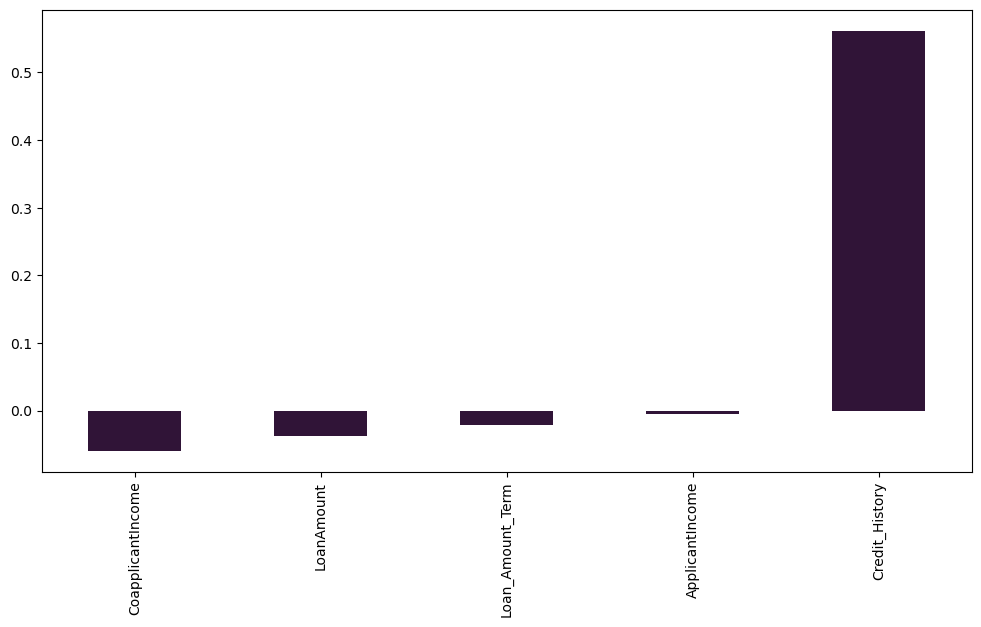

In [9]:
plt.figure(figsize = (12,6))
train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted') 

# Exploratory Data Analysis

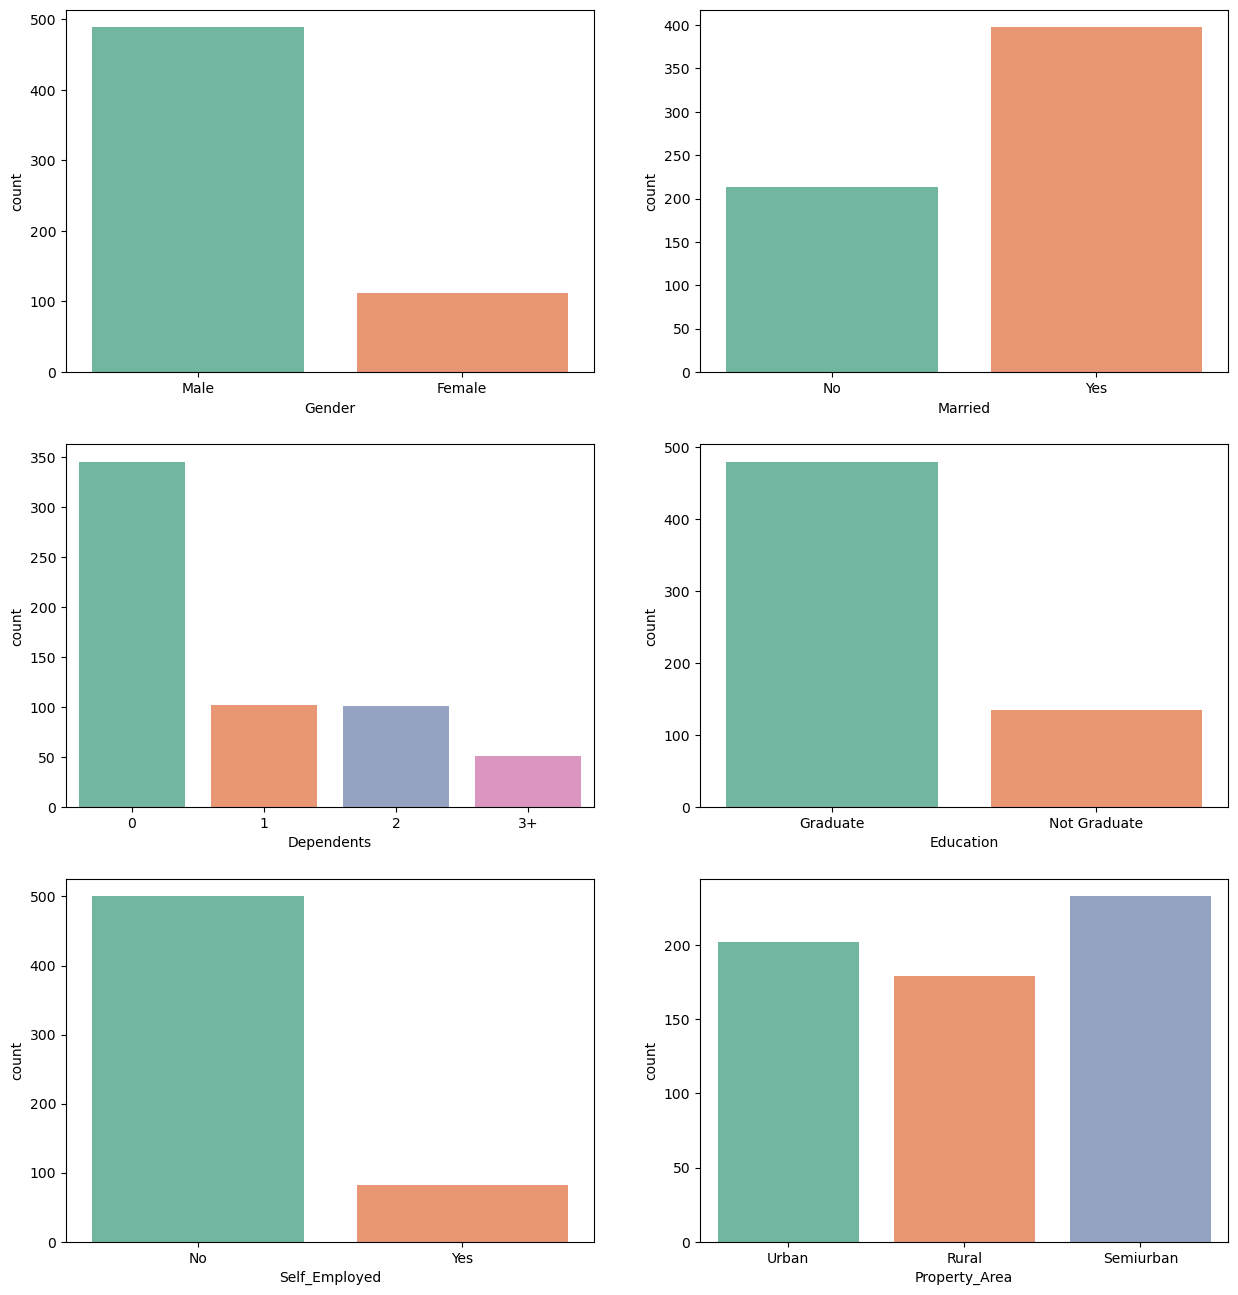

In [10]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(train['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(train['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(train['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(train['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(train['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(train['Property_Area'], ax=ax[2,1], palette='Set2')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

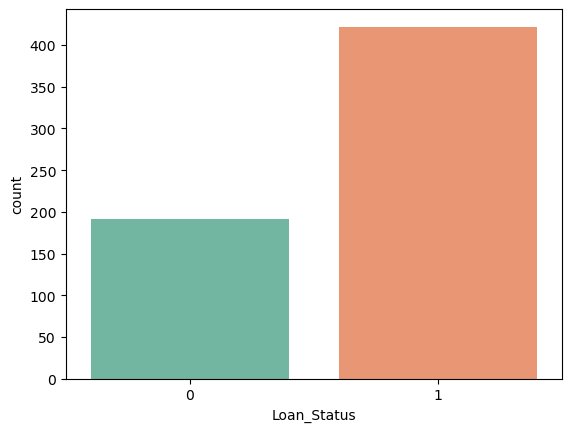

In [11]:
sns.countplot(train['Loan_Status'], palette='Set2')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

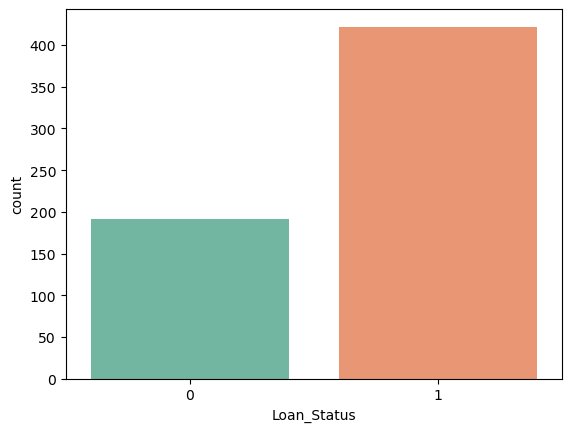

In [12]:
sns.countplot(train['Loan_Status'], palette='Set2')

<AxesSubplot:xlabel='Gender', ylabel='count'>

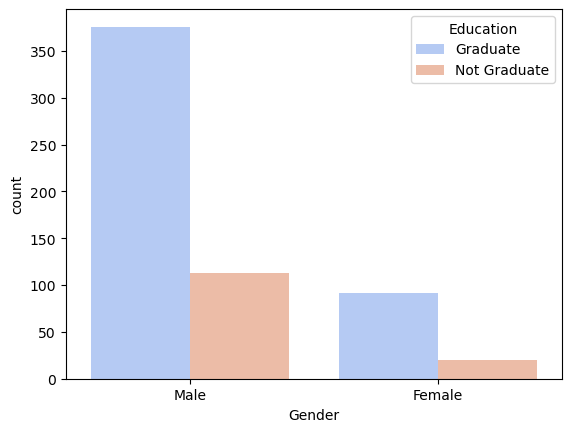

In [13]:
sns.countplot('Gender', hue = 'Education', data = train, palette = 'coolwarm')

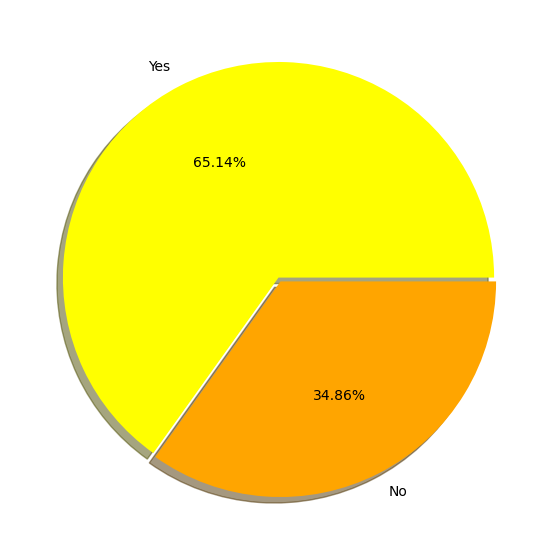

In [14]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [15]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


In [16]:
Education = train[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education

,LoanAmount
Education,
Graduate,154.060215
Not Graduate,118.409449


# Checking for null values

In [18]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

In [20]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

# Dealing with the missing data

In [26]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [27]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [28]:
#Changing the datatypes of certain columns

In [29]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [30]:
# Removing the '+' sign from Dependents column
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [31]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

In [32]:
#Imputing categorical columns

In [33]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [34]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [35]:
#Creating dummy variables for Property column

In [36]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

# Scaling the data

In [38]:
scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [39]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [40]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

# Splitting the data

In [42]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [45]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [46]:
#Building models
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.69it/s]


In [47]:
model.sort_values('Accuracy', ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.79,0.73,0.73,0.78,0.13
LinearSVC,0.78,0.70,0.70,0.76,0.05
NuSVC,0.78,0.70,0.70,0.75,0.04
SVC,0.78,0.70,0.70,0.75,0.02
CalibratedClassifierCV,0.78,0.70,0.70,0.76,0.11
RidgeClassifier,0.78,0.70,0.70,0.76,0.01
LogisticRegression,0.78,0.70,0.70,0.76,0.02
LinearDiscriminantAnalysis,0.78,0.70,0.70,0.76,0.02
BernoulliNB,0.78,0.70,0.70,0.76,0.01


In [48]:
!pip install tensorflow-datasets

In [49]:
from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
#import tensorflow as tf
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [50]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['AdaBoostClassifier ', AdaBoostClassifier()],
        ['ExtraTreesClassifier ', ExtraTreesClassifier()],
        ['XGBClassifier ', XGBClassifier()],
        ['GradientBoostingClassifier ', GradientBoostingClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()],
         ['LGBMClassifier ', LGBMClassifier()]]

In [51]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.7027027027027027
RandomForestClassifier  0.7837837837837838
AdaBoostClassifier  0.772972972972973
ExtraTreesClassifier  0.7837837837837838
XGBClassifier  0.7567567567567568
GradientBoostingClassifier  0.7351351351351352
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838
LGBMClassifier  0.745945945945946


In [52]:
#Hyperparameter Tuning

In [53]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'SGDClassifier' : {
        'model' : SGDClassifier(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'max_iter': [1000, 1100, 1500, 2100, 2800, 3000],
            'learning_rate' : ['optimal']
        }
    }
}

In [54]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.82,"LogisticRegression(C=0.3, max_iter=2100, penal..."
1,SVC,0.82,"SVC(C=0.1, kernel='linear')"
3,RandomForestClassifier,0.82,"(DecisionTreeClassifier(max_depth=3, max_featu..."
2,AdaBoostClassifier,0.81,"(DecisionTreeClassifier(max_depth=1, random_st..."
4,SGDClassifier,0.80,"SGDClassifier(max_iter=2800, penalty='l1')"


In [56]:
final['estimator'].iloc[1] # we get SVC as best model

SVC(C=0.1, kernel='linear')

In [58]:
#classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
#classifier.fit(X_train, y_train)
#prediction = classifier.predict(X_val)
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
# Predicting the test data

pred = svmclf.predict(X_test)

In [60]:
#Submission

In [61]:
test_df = pd.read_csv('test_lAUu6dG.csv')
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [62]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission_svc.csv', index=False)

In [63]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [64]:
submission.to_csv('sample_submission_svc.csv', index=False) # saving the file to_csv format